In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df = pd.read_csv('C:/Users/hongp/Desktop/org-Amazon-Products.csv',index_col=None)
df.head()

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"
2,2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990"
3,3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,"₹37,990","₹68,990"
4,4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790"


In [49]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551585 entries, 0 to 551584
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      551585 non-null  int64 
 1   name            551585 non-null  object
 2   main_category   551585 non-null  object
 3   sub_category    551585 non-null  object
 4   image           551585 non-null  object
 5   link            551585 non-null  object
 6   ratings         375791 non-null  object
 7   no_of_ratings   375791 non-null  object
 8   discount_price  490422 non-null  object
 9   actual_price    533772 non-null  object
dtypes: int64(1), object(9)
memory usage: 42.1+ MB


In [50]:
import re

In [51]:
def extract_main_name(url):
    match = re.search(r'in/([^/-]+)', url)  # Lấy phần sau 'in/' và trước '-'
    return match.group(1) if match else None



In [52]:
df['manufature'] = df['link'].apply(extract_main_name)
print(df[['link', 'manufature']].head())

                                                link manufature
0  https://www.amazon.in/Lloyd-Inverter-Convertib...      Lloyd
1  https://www.amazon.in/LG-Convertible-Anti-Viru...         LG
2  https://www.amazon.in/LG-Inverter-Convertible-...         LG
3  https://www.amazon.in/LG-Convertible-Anti-Viru...         LG
4  https://www.amazon.in/Carrier-Inverter-Split-C...    Carrier


In [53]:
df = df[['name',	'main_category'	,'sub_category','manufature',	'ratings',	'no_of_ratings',	'discount_price',	'actual_price']]
df


,name,main_category,sub_category,manufature,ratings,no_of_ratings,discount_price,actual_price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,Lloyd,4.2,"2,255","₹32,999","₹58,990"
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,LG,4.2,"2,948","₹46,490","₹75,990"
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,LG,4.2,"1,206","₹34,490","₹61,990"
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,LG,4.0,69,"₹37,990","₹68,990"
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,Carrier,4.1,630,"₹34,490","₹67,790"
...,...,...,...,...,...,...,...,...
551580,Adidas Regular Fit Men's Track Tops,sports & fitness,Yoga,Adidas,3.2,9,"₹3,449","₹4,599"
551581,Redwolf Noice Toit Smort - Hoodie (Black),sports & fitness,Yoga,Redwolf,2.0,2,"₹1,199","₹1,999"
551582,Redwolf Schrute Farms B&B - Hoodie (Navy Blue),sports & fitness,Yoga,Redwolf,4.0,1,"₹1,199","₹1,999"
551583,Puma Men Shorts,sports & fitness,Yoga,Puma,4.4,37,NaN,NaN


In [54]:
print('kiểm tra giá trị null:',df.isnull().sum())
print('kiểm tra dtype:',df.dtypes)

kiểm tra giá trị null: name                   0
main_category          0
sub_category           0
manufature             0
ratings           175794
no_of_ratings     175794
discount_price     61163
actual_price       17813
dtype: int64
kiểm tra dtype: name              object
main_category     object
sub_category      object
manufature        object
ratings           object
no_of_ratings     object
discount_price    object
actual_price      object
dtype: object


In [55]:
#tạo 2 dataframe với 2 mục đích xử lý missiong value remove null và fill null có điều kiện
df_remove_null = df.copy()
df_fillnull = df.copy()

In [56]:
# xử lý dữ liệu theo remove
# dữ liệu null cần loại bỏ trong cột actual price
df_remove_null = df_remove_null.dropna(subset = 'actual_price')
df_remove_null


,name,main_category,sub_category,manufature,ratings,no_of_ratings,discount_price,actual_price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,Lloyd,4.2,"2,255","₹32,999","₹58,990"
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,LG,4.2,"2,948","₹46,490","₹75,990"
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,LG,4.2,"1,206","₹34,490","₹61,990"
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,LG,4.0,69,"₹37,990","₹68,990"
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,Carrier,4.1,630,"₹34,490","₹67,790"
...,...,...,...,...,...,...,...,...
551579,BE SAVAGE Pink I Purple You Hoodie Suitable fo...,sports & fitness,Yoga,Be,4.6,6,₹711,₹999
551580,Adidas Regular Fit Men's Track Tops,sports & fitness,Yoga,Adidas,3.2,9,"₹3,449","₹4,599"
551581,Redwolf Noice Toit Smort - Hoodie (Black),sports & fitness,Yoga,Redwolf,2.0,2,"₹1,199","₹1,999"
551582,Redwolf Schrute Farms B&B - Hoodie (Navy Blue),sports & fitness,Yoga,Redwolf,4.0,1,"₹1,199","₹1,999"


In [57]:
#fuction loại các kí tự không phù hợp
def clean_numberic_column(df,column_name):
    for col in column_name:
        df[col] = df[col].astype(str).str.replace("₹", "", regex=True)  # Loại bỏ ký hiệu tiền tệ
        df[col] = df[col].str.replace(r"[^\d]", "", regex=True)
    return df

column_names = ["discount_price", "actual_price", "no_of_ratings"]


df_remove_null = clean_numberic_column(df_remove_null, column_names)
df_fillnull = clean_numberic_column(df_fillnull, column_names)

In [58]:
#chuyển dữ liệu từ kiểu object sang float
df_remove_null['actual_price'] = pd.to_numeric(df_remove_null['actual_price'], errors='coerce')
df_remove_null['discount_price'] = pd.to_numeric(df_remove_null['discount_price'], errors='coerce')
df_remove_null['ratings'] = pd.to_numeric(df_remove_null['ratings'], errors='coerce')
df_remove_null['no_of_ratings'] = pd.to_numeric(df_remove_null['no_of_ratings'], errors='coerce')

df_fillnull['actual_price'] = pd.to_numeric(df_fillnull['actual_price'], errors='coerce')
df_fillnull['discount_price'] = pd.to_numeric(df_fillnull['discount_price'], errors='coerce')
df_fillnull['ratings'] = pd.to_numeric(df_fillnull['ratings'], errors='coerce')
df_fillnull['no_of_ratings'] = pd.to_numeric(df_fillnull['no_of_ratings'], errors='coerce')

In [59]:
df_remove_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 533772 entries, 0 to 551584
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            533772 non-null  object 
 1   main_category   533772 non-null  object 
 2   sub_category    533772 non-null  object 
 3   manufature      533772 non-null  object 
 4   ratings         362797 non-null  float64
 5   no_of_ratings   365734 non-null  float64
 6   discount_price  490422 non-null  float64
 7   actual_price    533772 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 36.7+ MB


In [60]:
#fill giá trị na trong cột rating df_fillnull (ratings và actual price)
def fill_na_with_median(df, group_col, fill_cols):
    for col in fill_cols:
        df[col] = df[col].fillna(df.groupby(group_col)[col].transform("median"))
    return df

# Danh sách các cột cần xử lý
num_cols = ["ratings","actual_price"]

# Áp dụng hàm
df_filled = fill_na_with_median(df_fillnull, "sub_category", num_cols)

In [61]:
#fill NA trong df_removenull
df_remove_null["ratings"].fillna(0, inplace=True)
df_remove_null["no_of_ratings"].fillna(0, inplace=True)
df_remove_null["discount_price"].fillna(df_filled['actual_price'], inplace=True)
#fill NA trong df_filled
df_filled["discount_price"].fillna(df_filled['actual_price'], inplace=True)
df_filled["no_of_ratings"].fillna(0, inplace=True)



C:\Users\hongp\AppData\Local\Temp\ipykernel_11544\781548998.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_remove_null["ratings"].fillna(0, inplace=True)
C:\Users\hongp\AppData\Local\Temp\ipykernel_11544\781548998.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [62]:
#kiểm tra giá trị null của 2 bảng sau khi xử lý null
print(df_filled.isnull().sum())
print(df_remove_null.isnull().sum())

name              0
main_category     0
sub_category      0
manufature        0
ratings           0
no_of_ratings     0
discount_price    0
actual_price      0
dtype: int64
name              0
main_category     0
sub_category      0
manufature        0
ratings           0
no_of_ratings     0
discount_price    0
actual_price      0
dtype: int64


In [63]:
print("df_filled:\n", df_filled.describe())
print("df_remove_null:\n", df_remove_null.describe())

df_filled:
              ratings  no_of_ratings  discount_price  actual_price
count  551585.000000  551585.000000    5.515850e+05  5.515850e+05
mean        3.845049     563.741646    3.035201e+04  4.741925e+04
std         0.628820    7095.128433    2.494970e+05  1.333253e+07
min         1.000000       0.000000    0.000000e+00  0.000000e+00
25%         3.600000       0.000000    3.990000e+02  9.990000e+02
50%         3.900000       4.000000    7.540000e+02  1.599000e+03
75%         4.100000      49.000000    1.810000e+03  3.099000e+03
max         5.000000  589547.000000    1.065632e+07  9.900000e+09
df_remove_null:
              ratings  no_of_ratings  discount_price  actual_price
count  533772.000000  533772.000000    5.337720e+05  5.337720e+05
mean        2.604223     567.972820    3.061420e+04  4.825101e+04
std         1.892872    7110.652063    2.528719e+05  1.355316e+07
min         0.000000       0.000000    0.000000e+00  0.000000e+00
25%         0.000000       0.000000    3.990000

In [64]:
def zscore_outliers_grouped(df, group_col, target_cols, threshold=3):
    """
    Xử lý outliers theo Z-score trong từng nhóm của group_col.
    Thay thế outliers bằng giá trị trung bình của nhóm.
    
    df: DataFrame
    group_col: Cột dùng để nhóm (ví dụ: 'sub_category')
    target_cols: Danh sách các cột số cần xử lý outliers
    threshold: Ngưỡng Z-score để xác định outliers (mặc định là 3)
    """
    df_clean = df.copy()
    
    for col in target_cols:
        df_clean[col] = pd.to_numeric(df_clean[col], errors="coerce").astype(float)  # Ép kiểu về float
        
        def replace_outliers(sub_df):
            mean = sub_df[col].mean()
            std = sub_df[col].std()
            z_scores = abs((sub_df[col] - mean) / std)
            
            # Thay thế outliers bằng giá trị trung bình nhóm
            sub_df.loc[z_scores > threshold, col] = float(mean)  # Ép kiểu mean về float
            return sub_df
        
        # Áp dụng theo từng nhóm với cách sửa lỗi cảnh báo
        df_clean = df_clean.groupby(group_col, group_keys=False).apply(replace_outliers).reset_index(drop=True)
    
    return df_clean


In [65]:
#xử lý outliner bằng phương pháp IQR
def remove_outliers(df, columns):
    """
    Loại bỏ outliers từ DataFrame sử dụng phương pháp IQR
    
    Parameters:
    df (pandas.DataFrame): DataFrame cần xử lý
    columns (list): Danh sách các cột cần xử lý outliers
    
    Returns:
    pandas.DataFrame: DataFrame đã được xử lý outliers
    """
    df_clean = df.copy()
    
    for column in columns:
        # Tính Q1, Q3 và IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Xác định giới hạn trên và dưới
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Lọc ra các giá trị nằm trong khoảng cho phép
        df_clean = df_clean[(df_clean[column] >= lower_bound) & 
                           (df_clean[column] <= upper_bound)]
        
        print(f'Cột {column}:')
        print(f'- Số lượng outliers: {len(df) - len(df_clean)}')
        print(f'- Giới hạn dưới: {lower_bound:.2f}')
        print(f'- Giới hạn trên: {upper_bound:.2f}\n')
    
    return df_clean


In [66]:
#Z-Score
col_to_clean = ['actual_price']
df_filled_Z = zscore_outliers_grouped(df_filled, "sub_category", col_to_clean)
df_remove_null_Z = zscore_outliers_grouped(df_remove_null, "sub_category", col_to_clean)

C:\Users\hongp\AppData\Local\Temp\ipykernel_11544\2292905120.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_clean = df_clean.groupby(group_col, group_keys=False).apply(replace_outliers).reset_index(drop=True)
C:\Users\hongp\AppData\Local\Temp\ipykernel_11544\2292905120.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_clean = df_clean.groupby(group_col, group_keys=False).apply(replace_outlier

In [67]:
#IQR
df_filled_IQR = remove_outliers(df_filled, col_to_clean)
df_remove_null_IQR = remove_outliers(df_remove_null, col_to_clean)

Cột actual_price:
- Số lượng outliers: 70405
- Giới hạn dưới: -2151.00
- Giới hạn trên: 6249.00

Cột actual_price:
- Số lượng outliers: 65859
- Giới hạn dưới: -2025.00
- Giới hạn trên: 6015.00



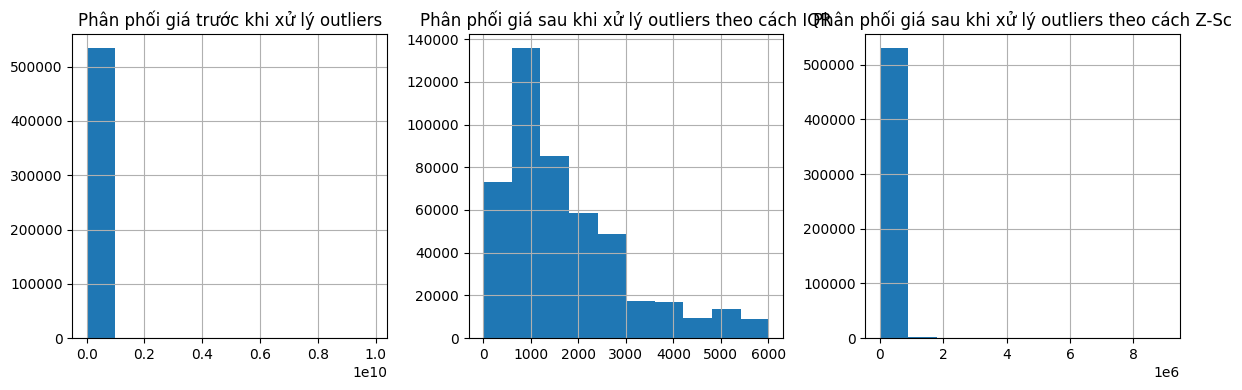

In [68]:
#data remove_null
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
df_remove_null['actual_price'].hist()
plt.title('Phân phối giá trước khi xử lý outliers')

plt.subplot(1, 3, 2)
df_remove_null_IQR['actual_price'].hist()
plt.title('Phân phối giá sau khi xử lý outliers theo cách IQR')

plt.subplot(1, 3, 3)
df_remove_null_Z['actual_price'].hist()
plt.title('Phân phối giá sau khi xử lý outliers theo cách Z-Sc')

plt.tight_layout()
plt.show()

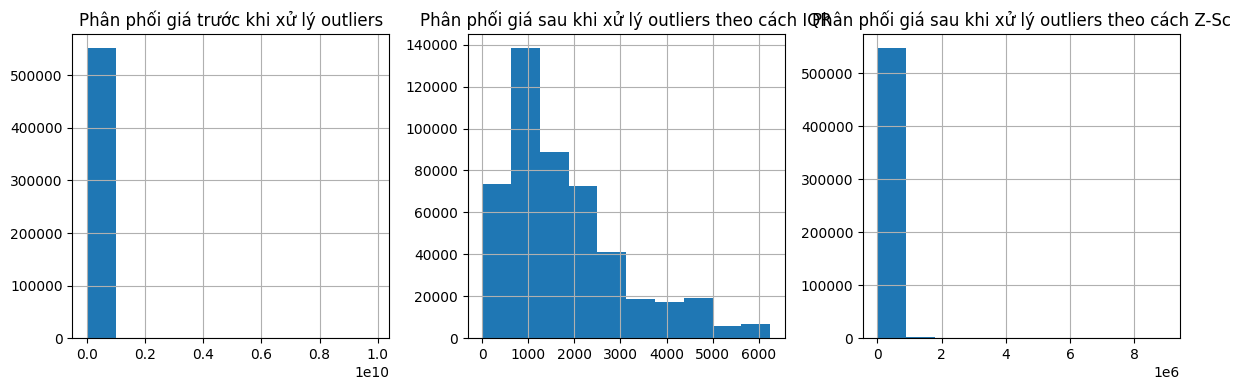

In [69]:
#data_fillna
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
df_filled['actual_price'].hist()
plt.title('Phân phối giá trước khi xử lý outliers')

plt.subplot(1, 3, 2)
df_filled_IQR['actual_price'].hist()
plt.title('Phân phối giá sau khi xử lý outliers theo cách IQR')

plt.subplot(1, 3, 3)
df_filled_Z['actual_price'].hist()
plt.title('Phân phối giá sau khi xử lý outliers theo cách Z-Sc')

plt.tight_layout()
plt.show()

In [70]:
df_filled_IQR.shape

(481180, 8)

In [71]:
print('kiểm tra fill:',df_filled.shape)
print('kiểm tra fill_IQR:',df_filled_IQR.shape)
print('kiểm tra fill_Z:',df_filled_Z.shape)
print('kiểm tra remove:',df_remove_null.shape)
print('kiểm tra remove_IQR:',df_remove_null_IQR.shape)
print('kiểm tra remove_Z:',df_remove_null_Z.shape)


kiểm tra fill: (551585, 8)
kiểm tra fill_IQR: (481180, 8)
kiểm tra fill_Z: (551585, 8)
kiểm tra remove: (533772, 8)
kiểm tra remove_IQR: (467913, 8)
kiểm tra remove_Z: (533772, 8)


In [72]:
df_filled_IQR.describe()

,ratings,no_of_ratings,discount_price,actual_price
count,481180.000000,481180.000000,481180.000000,481180.000000
mean,3.818982,534.139725,2835.381585,1796.194297
std,0.635441,6914.299478,16746.775752,1296.577825
min,1.000000,0.000000,0.000000,0.000000
25%,3.600000,0.000000,379.000000,899.000000
50%,3.900000,5.000000,640.000000,1495.000000
75%,4.100000,51.000000,1234.000000,2430.000000
max,5.000000,589547.000000,596402.000000,6249.000000


Vì phân phối chuẩn của tệp data xử lý theo IQR có đồ thị phân phối chuẩn hơn Sc-Z nên từ phần sau của bài phân tích chỉ tập trung vào 2 tệp data set là data mẫu fillnull và remove_null và 2 tệp data đã xử lý bằng phương pháp IQR

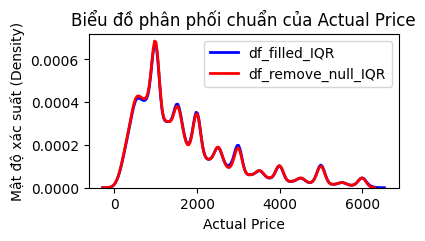

In [73]:
plt.figure(figsize=(4, 2))

# Vẽ đường KDE cho df_filled_IQR
sns.kdeplot(df_filled_IQR["actual_price"], label="df_filled_IQR", color="blue", linewidth=2)

# Vẽ đường KDE cho df_remove_null_IQR
sns.kdeplot(df_remove_null_IQR["actual_price"], label="df_remove_null_IQR", color="red", linewidth=2)

# Thêm tiêu đề và nhãn
plt.title("Biểu đồ phân phối chuẩn của Actual Price")
plt.xlabel("Actual Price")
plt.ylabel("Mật độ xác suất (Density)")
plt.legend()

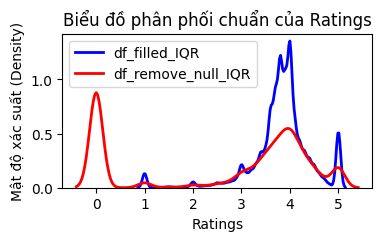

In [74]:
plt.figure(figsize=(4, 2))


# Vẽ đường KDE cho df_filled_IQR
sns.kdeplot(df_filled_IQR["ratings"], label="df_filled_IQR", color="blue", linewidth=2)

# Vẽ đường KDE cho df_remove_null_IQR
sns.kdeplot(df_remove_null_IQR["ratings"], label="df_remove_null_IQR", color="red", linewidth=2)

# Thêm tiêu đề và nhãn
plt.title("Biểu đồ phân phối chuẩn của Ratings")
plt.xlabel("Ratings")
plt.ylabel("Mật độ xác suất (Density)")
plt.legend()

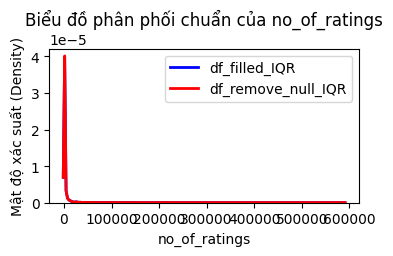

In [75]:
plt.figure(figsize=(4, 2))


# Vẽ đường KDE cho df_filled_IQR
sns.kdeplot(df_filled_IQR["no_of_ratings"], label="df_filled_IQR", color="blue", linewidth=2)

# Vẽ đường KDE cho df_remove_null_IQR
sns.kdeplot(df_remove_null_IQR["no_of_ratings"], label="df_remove_null_IQR", color="red", linewidth=2)

# Thêm tiêu đề và nhãn
plt.title("Biểu đồ phân phối chuẩn của no_of_ratings")
plt.xlabel("no_of_ratings")
plt.ylabel("Mật độ xác suất (Density)")
plt.legend()

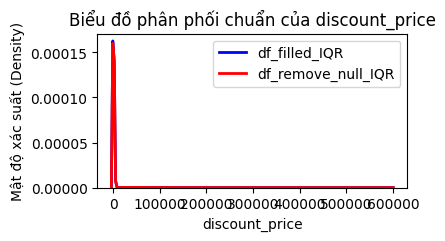

In [76]:
plt.figure(figsize=(4, 2))


# Vẽ đường KDE cho df_filled_IQR
sns.kdeplot(df_filled_IQR["discount_price"], label="df_filled_IQR", color="blue", linewidth=2)

# Vẽ đường KDE cho df_remove_null_IQR
sns.kdeplot(df_remove_null_IQR["discount_price"], label="df_remove_null_IQR", color="red", linewidth=2)

# Thêm tiêu đề và nhãn
plt.title("Biểu đồ phân phối chuẩn của discount_price")
plt.xlabel("discount_price")
plt.ylabel("Mật độ xác suất (Density)")
plt.legend()

# kết luận 2 data set xử lý bằng phương pháp fillnull hay removenull gần như là giống nhau không có sự khác biệt rõ giữa 2 tập data này nên từ phần sau chỉ tập trung vào 1 tập dataset là fillnull

Text(0, 0.5, 'Actual Price')

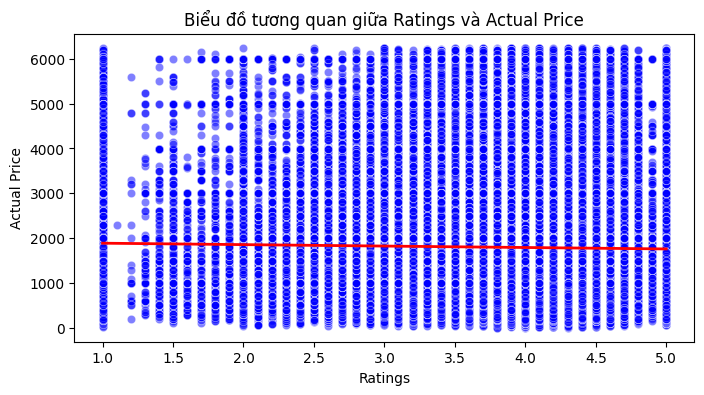

In [77]:
plt.figure(figsize=(8, 4))

# Vẽ scatter plot giữa ratings và actual_price
sns.scatterplot(data=df_filled_IQR, x="ratings", y="actual_price", alpha=0.5, color="blue")

# Thêm đường hồi quy để quan sát xu hướng
sns.regplot(data=df_filled_IQR, x="ratings", y="actual_price", scatter=False, color="red", line_kws={"linewidth": 2})

# Thêm tiêu đề và nhãn trục
plt.title("Biểu đồ tương quan giữa Ratings và Actual Price")
plt.xlabel("Ratings")
plt.ylabel("Actual Price")

#Tương quan giữa ratings và giá không có sự tương quan rõ ràng

In [78]:
#df_filled_IQR['manufature'].value_counts()

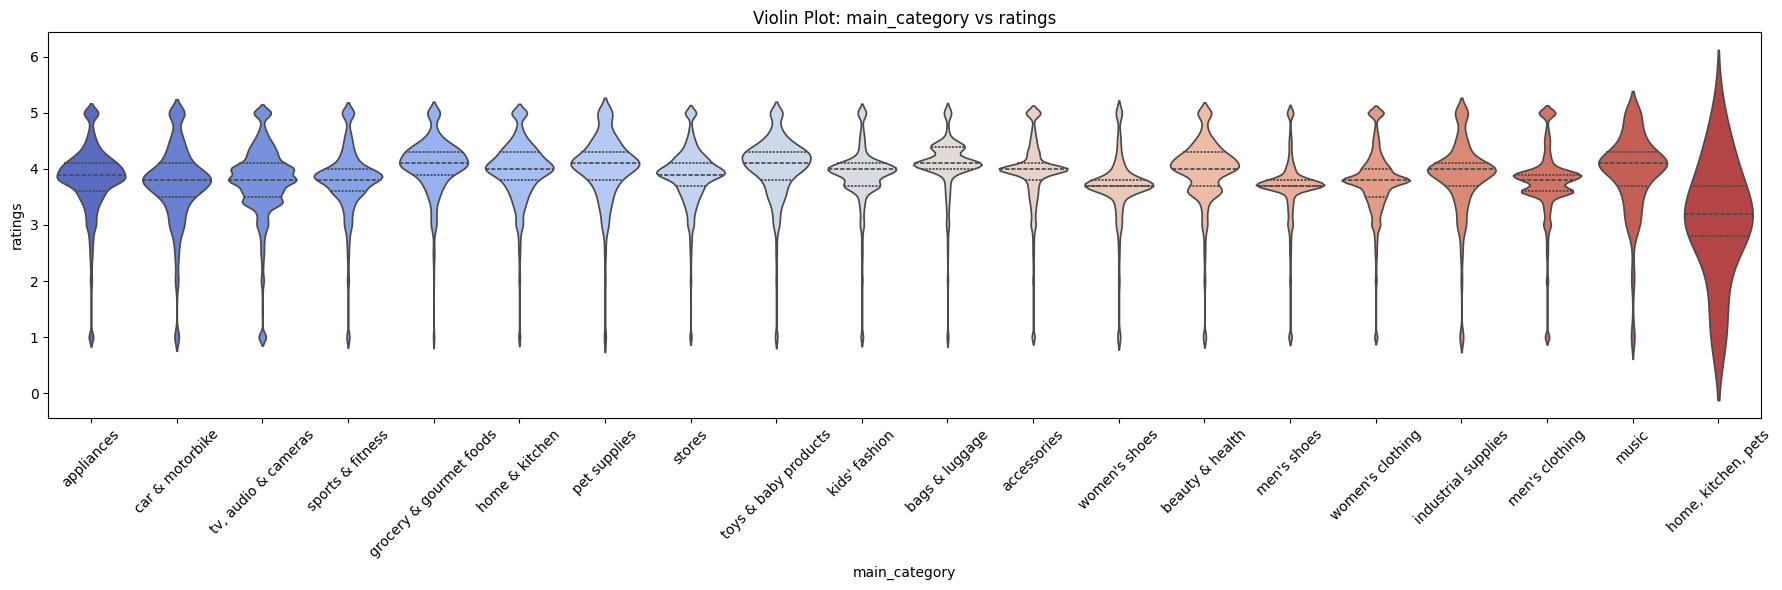

In [79]:
plt.figure(figsize=(18, 6))
#tạo dataframe với top 10 trong sub_category
#top_10_sub_categories = df_filled_IQR["main_category"].value_counts().index[:10]
#df_top_10 = df_filled_IQR[df_filled_IQR["main_category"].isin(top_10_sub_categories)]

# Violin chart cho main_category vs ratings
plt.subplot(1,1 ,1)
sns.violinplot(x="main_category", y="ratings", data=df_filled_IQR, inner="quartile", palette="coolwarm",hue="main_category",)
plt.xticks(rotation=45)
plt.title("Violin Plot: main_category vs ratings")

plt.tight_layout()

main_category vs ratings ngành hàng Home,kit có sự khác biệt so với 19 ngành hàng còn lại

In [80]:
#dataframe chứa Main_category == tv, audio & cameras
df_filtered_home = df_filled_IQR[df_filled_IQR["main_category"] == 'home, kitchen, pets']
df_filtered_home.shape

(21, 8)

Sản phẩm thuộc nhóm home,kit có số lượng sản phẩm chiếm không cao nên sẽ bỏ qua trường hợp này


Text(0.5, 1.0, 'Violin Plot: manufature vs ratings of homekit')

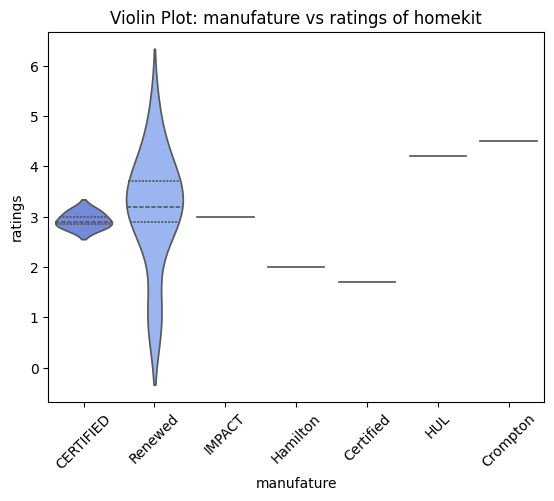

In [81]:
sns.violinplot(x="manufature", y="ratings", data=df_filtered_home, inner="quartile", palette="coolwarm",hue="manufature",)
plt.xticks(rotation=45)
plt.title("Violin Plot: manufature vs ratings of homekit")

In [82]:
#kiểm tra no_of ratings
top_10_main_category = (
    df_filled_IQR.groupby("main_category")["no_of_ratings"]
    .sum()
    .nlargest(10)
    .reset_index()
)
print(top_10_main_category)


          main_category  no_of_ratings
0   tv, audio & cameras    148259066.0
1                stores     18561981.0
2      women's clothing     13802449.0
3  toys & baby products     13278479.0
4            appliances     13218911.0
5           accessories     10273499.0
6       beauty & health     10193622.0
7        home & kitchen      8866528.0
8           men's shoes      5234183.0
9        men's clothing      4837960.0


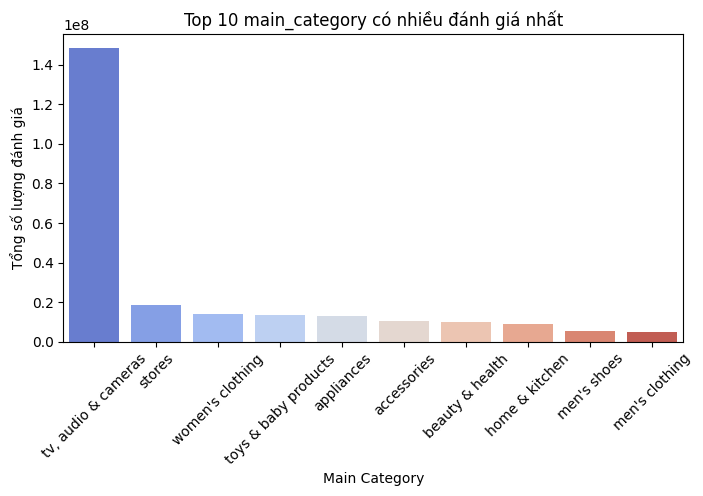

In [83]:
plt.figure(figsize=(8, 4))
sns.barplot(
    x="main_category",
    y="no_of_ratings",
    hue="main_category",
    data=top_10_main_category,
    palette="coolwarm",
    legend=False
)

plt.xticks(rotation=45)
plt.title("Top 10 main_category có nhiều đánh giá nhất")
plt.xlabel("Main Category")
plt.ylabel("Tổng số lượng đánh giá")

plt.show()

tv,audio cam có số lượng đánh giá nhiều hơn so với trong top 10 nên ở dưới sẽ tách riêng main_category này và phần còn lại

In [84]:
#dataframe chứa Main_category == tv, audio & cameras
df_filtered_tv_au = df_filled_IQR[df_filled_IQR["main_category"] == 'tv, audio & cameras']
df_filtered_tv_au.head(10)


,name,main_category,sub_category,manufature,ratings,no_of_ratings,discount_price,actual_price
11570,OnePlus Bullets Z2 Bluetooth Wireless in Ear E...,"tv, audio & cameras",All Electronics,Oneplus,4.2,90304.0,1999.0,2299.0
11574,boAt Airdopes 141 Bluetooth Truly Wireless in ...,"tv, audio & cameras",All Electronics,Airdopes,3.9,172347.0,1299.0,3995.0
11575,"Apple 20W USB-C Power Adapter (for iPhone, iPa...","tv, audio & cameras",All Electronics,Apple,4.6,61748.0,1589.0,1900.0
11581,boAt Airdopes Atom 81 True Wireless in Ear Ear...,"tv, audio & cameras",All Electronics,boAt,3.8,3327.0,1299.0,4490.0
11582,boAt Airdopes 141 Bluetooth Truly Wireless in ...,"tv, audio & cameras",All Electronics,Airdopes,3.9,172347.0,1299.0,4490.0
11583,boAt BassHeads 100 in-Ear Wired Headphones wit...,"tv, audio & cameras",All Electronics,boAt,4.1,375110.0,399.0,999.0
11584,boAt Rockerz 330 Bluetooth Wireless in Ear Ear...,"tv, audio & cameras",All Electronics,boAt,4.1,114951.0,1099.0,3990.0
11585,Lapster 5-in-1 Multi-Function Laptop Cleaning ...,"tv, audio & cameras",All Electronics,Lapster,4.2,765.0,97.0,999.0
11587,OnePlus Bullets Z2 Bluetooth Wireless in Ear E...,"tv, audio & cameras",All Electronics,Oneplus,4.2,90304.0,1999.0,2299.0
11588,boAt Airdopes 121v2 in-Ear True Wireless Earbu...,"tv, audio & cameras",All Electronics,Airdopes,3.8,188031.0,1099.0,2990.0


In [85]:
#dataframe chứa Main_category != tv, audio & cameras
df_filtered_excluded_tv_au = df_filled_IQR[df_filled_IQR["main_category"] != 'tv, audio & cameras']
df_filtered_excluded_tv_au

,name,main_category,sub_category,manufature,ratings,no_of_ratings,discount_price,actual_price
106,Small Personal Air Conditioners Mini Air Condi...,appliances,Air Conditioners,Personal,3.1,85.0,2499.0,2999.0
123,ALLWIN TAFTA High Quality Metal Special Coated...,appliances,Air Conditioners,ALLWIN,4.6,7.0,647.0,1500.0
125,Hexzone Floor AC Stand Certified Special Coate...,appliances,Air Conditioners,Hexzone,4.1,9.0,679.0,1249.0
150,AC Stand/Heavy Duty Air Conditioner Outdoor Un...,appliances,Air Conditioners,Stand,5.0,2.0,599.0,999.0
187,ThreeH USB Fan Silent Mini Air Conditioner Tra...,appliances,Air Conditioners,ThreeH,4.0,1400.0,1219.0,1449.0
...,...,...,...,...,...,...,...,...
551580,Adidas Regular Fit Men's Track Tops,sports & fitness,Yoga,Adidas,3.2,9.0,3449.0,4599.0
551581,Redwolf Noice Toit Smort - Hoodie (Black),sports & fitness,Yoga,Redwolf,2.0,2.0,1199.0,1999.0
551582,Redwolf Schrute Farms B&B - Hoodie (Navy Blue),sports & fitness,Yoga,Redwolf,4.0,1.0,1199.0,1999.0
551583,Puma Men Shorts,sports & fitness,Yoga,Puma,4.4,37.0,1499.0,1499.0


In [86]:
count_unique_filtered_tv_au = df_filtered_tv_au['manufature'].nunique()
print("Số lượng manufature trong TV:",count_unique_filtered_tv_au)

count_unique_filtered_excluded_tv_au = df_filtered_excluded_tv_au['manufature'].nunique()
print("Số lượng manufature ngoài TV:",count_unique_filtered_excluded_tv_au)

Số lượng manufature trong TV: 7465
Số lượng manufature ngoài TV: 42128


In [87]:
#top 10 sản phẩm từ tv_au
top_10_manu_tv = (
    df_filtered_tv_au.groupby("manufature")['no_of_ratings']
    .sum()
    .nlargest(13)
    .reset_index()
)
top_10_manu_tv

,manufature,no_of_ratings
0,AmazonBasics,20185226.0
1,boAt,19705796.0
2,SanDisk,19016528.0
3,TP,6479230.0
4,JBL,5874135.0
5,Boat,2391674.0
6,Zebronics,2240071.0
7,Bassheads,2215636.0
8,Bassbuds,2148763.0
9,BassHeads,2044364.0


In [ ]:
# dataframe manufature cần lấy từ 'top_10_manu_tv'
top_manufatures = [
    "AmazonBasics", "boAt", "SanDisk", "TP", "JBL", "Boat", "Zebronics",
    "Bassheads", "Bassbuds", "BassHeads", "Boult", "Noise", "Airdopes"
]

# Lọc DataFrame
df_top_manufatures_tv_au = df_filled_IQR[df_filled_IQR["manufature"].isin(top_manufatures)]

# Hiển thị kết quả
print(df_top_manufatures_tv_au)


In [89]:
# top 10 sản phẩm (ngoại trừ tv_au)
top_10_manu_ex_tv = (
    df_filtered_excluded_tv_au.groupby("manufature")['no_of_ratings']
    .sum()
    .nlargest(10)
    .reset_index()
)
top_10_manu_ex_tv

,manufature,no_of_ratings
0,Huggies,3674773.0
1,Amazon,2343893.0
2,crocs,1919490.0
3,Jockey,1710464.0
4,AmazonBasics,1363966.0
5,Sparx,1320832.0
6,Philips,1250771.0
7,Prestige,1230401.0
8,Pigeon,1199981.0
9,Supples,1190823.0


In [ ]:
# dataframe manufature cần lấy từ 'top_10_manu_ex_tv'
top_manufatures_new = [
    "Huggies", "Amazon", "crocs", "Jockey", "AmazonBasics",
    "Sparx", "Philips", "Prestige", "Pigeon", "Supples"
]

# Lọc DataFrame
df_top_manufatures_ex_tv = df_filled_IQR[df_filled_IQR["manufature"].isin(top_manufatures_new)]

# Hiển thị kết quả
print(df_top_manufatures_ex_tv)


In [91]:
df_top_manufatures_ex_tv

,name,main_category,sub_category,manufature,ratings,no_of_ratings,discount_price,actual_price
720,Pigeon by Stovekraft Amaze Plus Electric Kettl...,appliances,All Appliances,Pigeon,3.9,128941.0,599.0,1245.0
721,Pigeon Polypropylene Mini Handy and Compact Ch...,appliances,All Appliances,Pigeon,4.1,274505.0,199.0,545.0
727,"Prestige Electric Kettle PKOSS - 1500watts, St...",appliances,All Appliances,Prestige,3.9,64888.0,699.0,1445.0
729,Philips GC1905 1440-Watt Steam Iron with Spray...,appliances,All Appliances,Philips,4.3,38928.0,1699.0,2295.0
734,Philips Viva Collection HD4928/01 2100-Watt In...,appliances,All Appliances,Philips,4.2,40782.0,3099.0,5995.0
...,...,...,...,...,...,...,...,...
551420,Amazon Brand - Symactive Men's Activewear Gym ...,sports & fitness,Yoga,Amazon,3.9,0.0,32206.0,1099.0
551550,Amazon Brand - Symactive Men's Activewear Gym ...,sports & fitness,Yoga,Amazon,3.9,0.0,699.0,2199.0
551551,Amazon Brand - Symactive Men's Activewear Gym ...,sports & fitness,Yoga,Amazon,3.9,0.0,65101.0,2399.0
551569,Amazon Brand - Symactive Men's Activewear Gym ...,sports & fitness,Yoga,Amazon,3.9,0.0,699.0,2199.0


Text(0, 0.5, 'Actual Price')

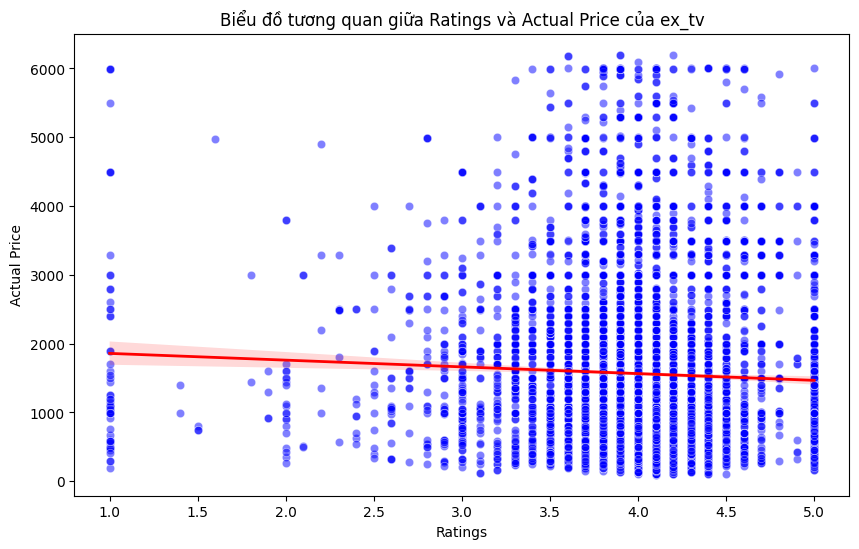

In [92]:
plt.figure(figsize=(10, 6))

# Vẽ scatter plot giữa ratings và actual_price
sns.scatterplot(data=df_top_manufatures_ex_tv, x="ratings", y="actual_price", alpha=0.5, color="blue")

# Thêm đường hồi quy để quan sát xu hướng
sns.regplot(data=df_top_manufatures_ex_tv, x="ratings", y="actual_price", scatter=False, color="red", line_kws={"linewidth": 2})

# Thêm tiêu đề và nhãn trục
plt.title("Biểu đồ tương quan giữa Ratings và Actual Price của ex_tv")
plt.xlabel("Ratings")
plt.ylabel("Actual Price")

Text(0, 0.5, 'Actual Price')

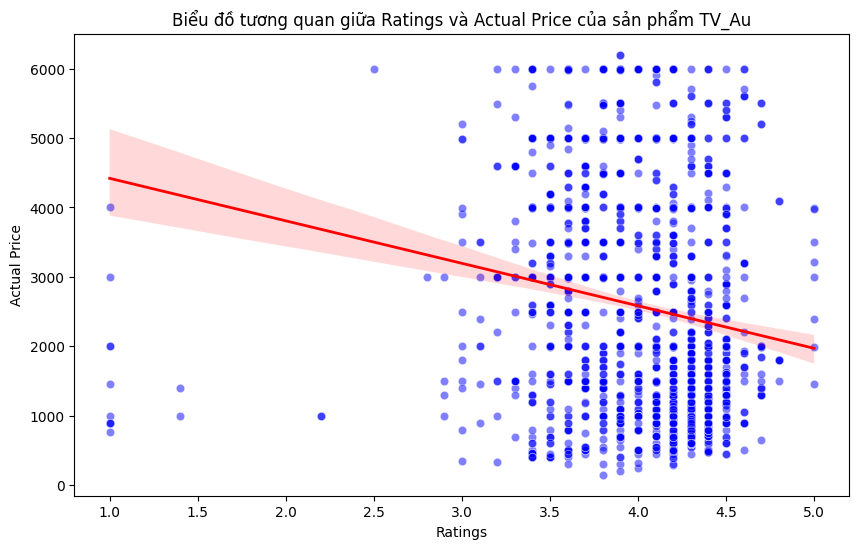

In [93]:
plt.figure(figsize=(10, 6))

# Vẽ scatter plot giữa ratings và actual_price
sns.scatterplot(data=df_top_manufatures_tv_au, x="ratings", y="actual_price", alpha=0.5, color="blue")

# Thêm đường hồi quy để quan sát xu hướng
sns.regplot(data=df_top_manufatures_tv_au, x="ratings", y="actual_price", scatter=False, color="red", line_kws={"linewidth": 2})

# Thêm tiêu đề và nhãn trục
plt.title("Biểu đồ tương quan giữa Ratings và Actual Price của sản phẩm TV_Au")
plt.xlabel("Ratings")
plt.ylabel("Actual Price")

In [100]:
df_top_manufatures_tv_au_c = df_top_manufatures_tv_au.copy()

In [106]:
df_selected = df_top_manufatures_tv_au_c[["ratings", "no_of_ratings", "actual_price", "discount_price"]]


<Axes: >

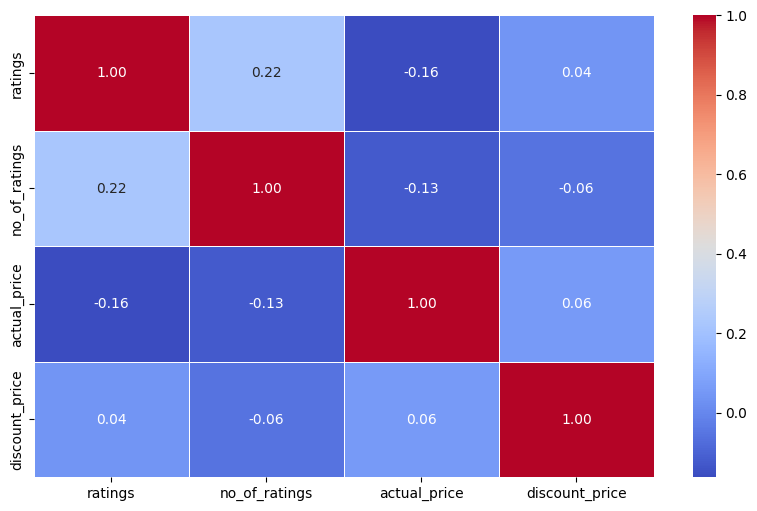

In [107]:
# Tính ma trận tương quan
plt.figure(figsize=(10, 6))
correlation_matrix = df_selected.corr()

# Vẽ heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

Nhận xét từ 2 biểu đồ
- Biểu đồ tương quan giữa Ratings và Actual Price của nhóm sản phẩm Ex_TV không thể hiện xu hướng rõ ràng.
- Tuy nhiên, chúng có mô hình tương quan tương tự như dữ liệu chung của toàn bộ sản phẩm.

- Biểu đồ tương quan giữa Ratings và Actual Price của sản phẩm thuộc danh mục TV_Au cho thấy mặc dù các sản phẩm này có số lượng đánh giá cao hơn hẳn so với mặt bằng chung, nhưng xu hướng lại có tương quan nghịch.
-> Điều này có nghĩa là các sản phẩm có giá thấp đang nhận được nhiều đánh giá cao hơn.
Phần lớn sản phẩm thuộc danh mục này tập trung ở mức giá dưới 2000.